In [1]:
#coding:utf-8
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [3]:
#读取数据
data = pd.read_csv('diabetes.csv')
print('dataset shape {}'.format(data.shape))

dataset shape (768, 9)


In [4]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#Pregancies:怀孕的次数.
#Glucose:血浆葡萄糖浓度,采用2小时口服葡萄糖耐量实验测得.
#BloodPressure:舒张压(毫米汞柱).
#SkinThickness:肱三头肌皮肤褶皱厚度(毫米).
#Insulin:两个小时血清胰岛素(μU/毫升).
#BMI:身体质量指数,体重除以身高的平方.
#Diabetes Pedigree Function:糖尿病血统指数,糖尿病和家庭遗传相关.
#Age:年龄.

/home/crius/anaconda3/envs/python35/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


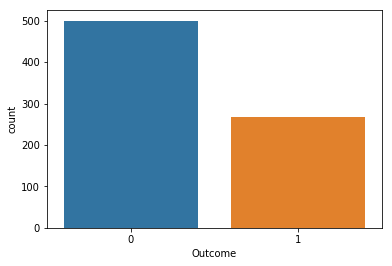

In [6]:
data.groupby('Outcome').size()
sns.countplot(data['Outcome'],label="Count")

In [7]:
#X是特征向量
#y是类别
X = data.iloc[:, 0:8]
y = data.iloc[:, 8]
print('Shape of X {}'.format(X.shape))
print('Shape of y {}'.format(y.shape))

Shape of X (768, 8)
Shape of y (768,)


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print('Train set accuracy: {:.2f}'.format(knn.score(X_train, y_train)))

Train set accuracy: 0.81


In [10]:
print('Test set accuracy: {:.2f}'.format(knn.score(X_test, y_test)))

Test set accuracy: 0.74


In [11]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
#from common.utils import plot_learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/home/crius/anaconda3/envs/python35/lib/python3.5/site-packages/matplotlib/pyplot.py'>

/home/crius/anaconda3/envs/python35/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


<Figure size 2000x1200 with 0 Axes>

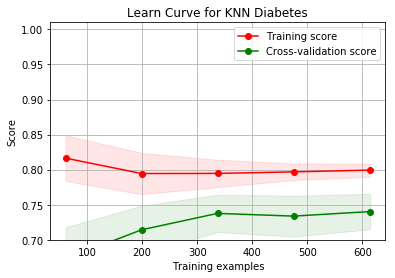

In [12]:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plt.figure(figsize=(10, 6), dpi=200)
plot_learning_curve(knn, "Learn Curve for KNN Diabetes", X, y, ylim=(0.7, 1.01), cv=cv)

In [13]:
#看图有两个问题:
#1.训练样本的拟合情况不佳,评分0.78,说明模型太简单.
#2.模型的准确性欠佳.

In [14]:
#特征选择及数据可视化
#我们有8个特征,无法在这么高的维度里画出来观察.
#怎么办?
#1.特征选择,即只选择2个与输出相关性最大的特征,这样就可以在二维平面画出输入特征值与输出值的关系了.

In [24]:
from sklearn.feature_selection import SelectKBest

selector = SelectKBest(k=2)
X_new = selector.fit_transform(X, y)
X_new[0:5]

array([[148. ,  33.6,  50. ],
       [ 85. ,  26.6,  31. ],
       [183. ,  23.3,  32. ],
       [ 89. ,  28.1,  21. ],
       [137. ,  43.1,  33. ]])

In [25]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y, test_size=0.2)

In [26]:
#到底选了8个特征的哪两个特征?

#它们分别是Glucose(血糖浓度)和BMI(身体质量指数)
#为什么是它们下次课再说.

#血糖浓度和糖尿病的关系自不必说,身体质量指数反应肥胖程度的指标.



In [27]:
knn.fit(X_new_train, y_new_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [28]:
print('Train set accuracy: {:.2f}'.format(knn.score(X_new_train, y_new_train)))

Train set accuracy: 0.81


In [29]:
print('Test set accuracy: {:.2f}'.format(knn.score(X_new_test, y_new_test)))

Test set accuracy: 0.64


/home/crius/anaconda3/envs/python35/lib/python3.5/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


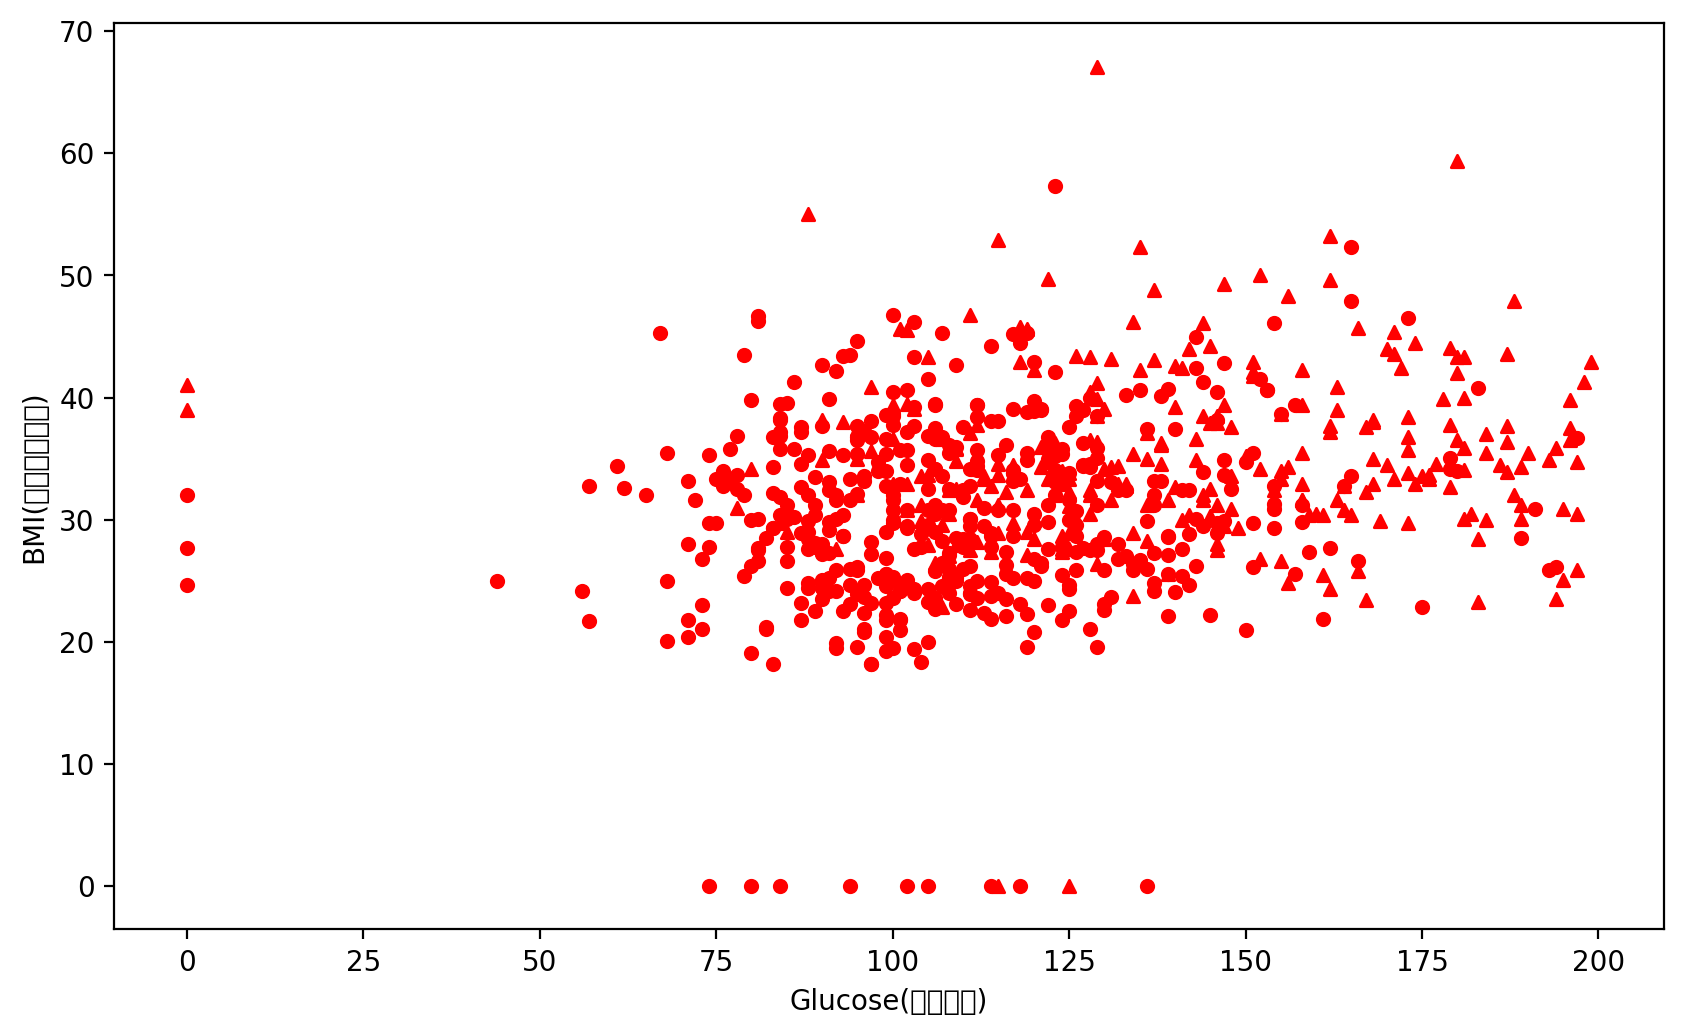

In [30]:
#画出数据
plt.figure(figsize=(10, 6), dpi=200)
plt.xlabel(u"Glucose(血糖浓度)")
plt.ylabel(u"BMI(身体质量指数)")
#
plt.scatter(X_new[y==0][:, 0], X_new[y==0][:, 1], c='r', s=20, marker='o')
#
plt.scatter(X_new[y==1][:, 0], X_new[y==1][:, 1], c='r', s=20, marker='^')

In [22]:
#在中间数据集的区域,阳性样本和阴性样本几乎重叠在一起了.
#假设现在有一个待预测的样本在中间密集区域,它的阳性邻居多还是阴性邻居居多呢?

In [23]:
#下次课继续解决它.